# 차원축소 Assignment2

In [74]:
from IPython.core.display import display, HTML

## 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)

## rows 500
pd.set_option('display.max_rows', 500)

## columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요  
쭉 실행시켜주시고, 데이터 스케일링 빈칸은 채워주세요!

In [330]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# seaborn
import seaborn as sns

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [14]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [15]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [18]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

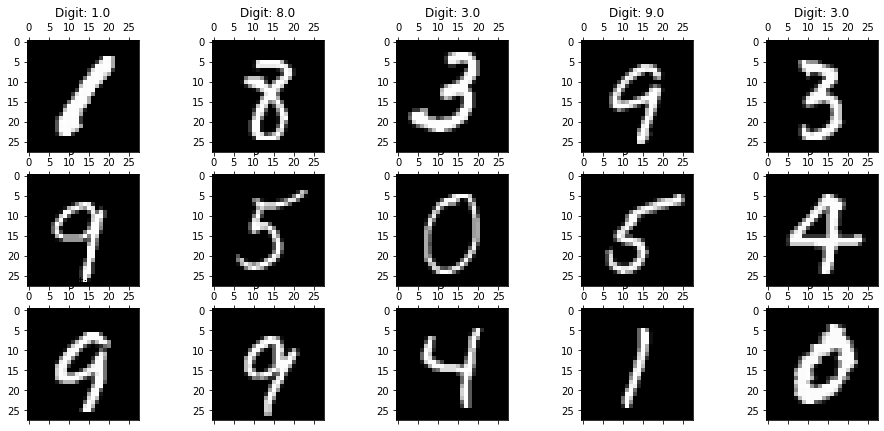

In [21]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) 스케일링 해주세요

In [49]:
# 이미지 데이터 스케일링 시, 타겟값은 음수를 포함하지 않아야 합니다!
# 왜곡이 생길 우려가 있는 스케일링도 지양해주세요
scaled_X = X / 255.0 # pixel 값으로 나누어줌으로써 0~1 사이의 값을 갖도록 한다. 

### 2) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할해주세요

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, shuffle=True)

In [51]:
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 3) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주세요!<br>
scree plot을 직접 그려서 확인해주세요!

In [52]:
from sklearn.decomposition import PCA

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA

In [70]:
pca = PCA() # 전체 feature 개수로 주성분 개수 설정하여 pca
pca_arr = pca.fit_transform(X_train)
pca_cols = [f'pca{num+1}' for num in range(X_train.shape[1])]
pca_df = pd.DataFrame(pca_arr, columns = pca_cols)

In [71]:
pca_df.head() # pca가 적용된 dataframe

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca775,pca776,pca777,pca778,pca779,pca780,pca781,pca782,pca783,pca784
0,1.966427,3.097665,-1.296006,3.773776,0.546952,2.283746,-2.012443,1.247324,1.608317,-0.625751,...,0.0,0.0,0.0,0.0,3.280535e-14,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,2.265244,2.532835,0.258351,4.782252,-0.176493,0.724533,1.784528,-0.624332,-0.489333,-0.821886,...,0.0,0.0,0.0,0.0,-2.461257e-16,2.564017e-15,-1.994746e-16,3.852291e-15,-1.255806e-15,-1.474424e-17
2,2.178326,0.839381,-0.867758,3.391374,2.492236,-2.222713,1.293563,-2.646686,-0.862663,-1.189082,...,0.0,0.0,0.0,0.0,-4.138889e-16,-5.498004e-16,5.697984e-16,-2.095294e-15,4.229292e-16,7.036186e-18
3,0.225351,-0.799047,0.798695,-2.247304,0.064028,-1.569078,0.162122,2.582294,1.390115,0.115919,...,0.0,0.0,0.0,0.0,1.071573e-16,3.739591e-15,-3.399049e-15,-4.879688e-16,-8.821400e-16,2.692434e-16
4,-0.653587,-1.221795,-0.543999,-1.384412,-1.525119,-1.990759,0.546086,2.259778,-1.361230,-0.077603,...,0.0,0.0,0.0,0.0,-1.425573e-16,1.957012e-15,1.254793e-15,-5.971292e-16,4.647849e-16,-2.162749e-16


In [78]:
# explained_variance: The amount of variance explained by each of the selected components.
# explained_variance_ratio: Percentage of variance explained by each of the selected components.
# cum_sum_ratio: explained_variance_ratio의 누적합 

result = pd.DataFrame({'explained_variance':pca.explained_variance_,
                      'explained_variance_ratio':pca.explained_variance_ratio_}, 
                     index=pca_cols)
result['cum_sum_ratio'] = result['explained_variance_ratio'].cumsum()
result.head(50)

,explained_variance,explained_variance_ratio,cum_sum_ratio
pca1,5.147110,0.097678,0.097678
pca2,3.759830,0.071351,0.169029
pca3,3.246869,0.061617,0.230646
pca4,2.844239,0.053976,0.284622
pca5,2.580396,0.048969,0.333591
pca6,2.275757,0.043188,0.376778
pca7,1.723075,0.032699,0.409478
pca8,1.515899,0.028768,0.438245
pca9,1.450500,0.027527,0.465772
pca10,1.235087,0.023439,0.489210


### explained_variance_ratio와 이에 대한 누적합을 동시에 시각화

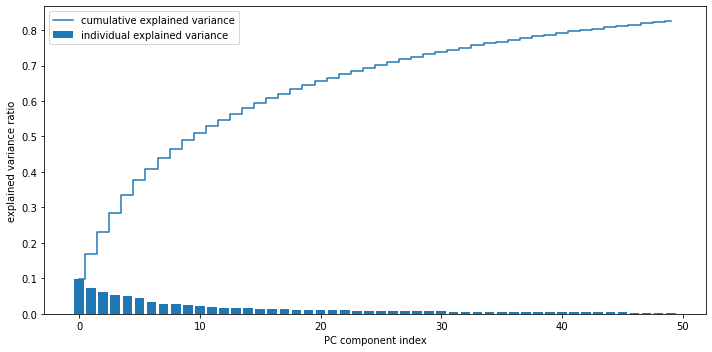

In [108]:
plt.figure(figsize=(10,5))

tmp = result.iloc[:50] # 상위 50개의 주성분만 분석
plt.bar(range(0, len(tmp)), tmp['explained_variance_ratio'], align='center', label='individual explained variance')
plt.step(range(0, len(tmp)), tmp['cum_sum_ratio'], where='mid', label='cumulative explained variance')
plt.xlabel('PC component index') # x축은 prinicipal component의 인덱스 
plt.ylabel('explained variance ratio') # y축은 0~1 비율
plt.legend(loc='best')
plt.tight_layout()
plt.show()

약 50개정도의 주성분으로 총분산의 약 80퍼센트를 설명  

1) 총분산이 설명하는 비중이 80%에서 주성분 개수 결정: `43개`   
2) 0.7보다 높은 고윳값을 갖는 주성분을 선택: `16개` 

### PCA Scree Plot

In [221]:
lst = [x for x in np.arange(pca.n_components_) if x%20==0] 
tmp_arr = pca.explained_variance_ratio_[lst]  # explained ratio를 20개 간격으로 저장

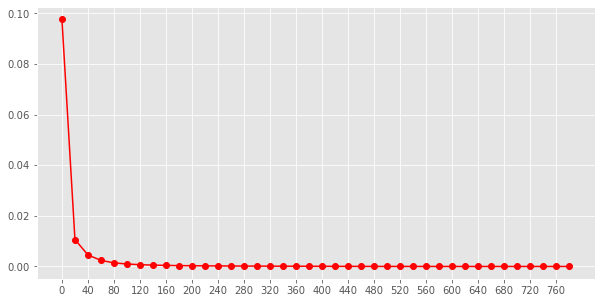

In [275]:
# explained ratio를 20개 간격으로 plot

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(tmp_arr, 'ro-')
plt.xticks(np.arange(0, len(tmp_arr), 2), [x*20 for x in np.arange(0, len(tmp_arr), 2)])
plt.show()

명확한 elbow point를 도출해내기가 어렵다. 20~40사이로 예상  
16기 차원축소 우수과제자 이예림님의 코드에서 **KneeLocator**를 활용한 것을 보고 적용해 보았습니다 !


In [225]:
from kneed import KneeLocator

In [276]:
x = np.arange(pca.n_components_)
y = pca.explained_variance_ratio_
kneedle = KneeLocator(x,y ,curve='convex', direction='decreasing')

In [278]:
kneedle.elbow # KneeLocator에서 지정해주는 elbow point

49

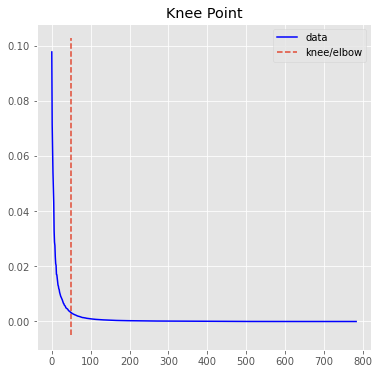

In [283]:
# Normalized data, normalized knee, and normalized distance curve.
kneedle.plot_knee()

3) Scree plot을 활용한 주성분 개수 결정: `49개`

### PCA 주성분에 따른 레이블 분포 시각화 

In [327]:
pca_subset = pca_df.iloc[:, :2] # 첫 번째, 두 번째 주성분만 가져오기 
pca_subset['label'] = y_train.flatten()

<ipython-input-327-9f0a735022a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_subset['label'] = y_train.flatten()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


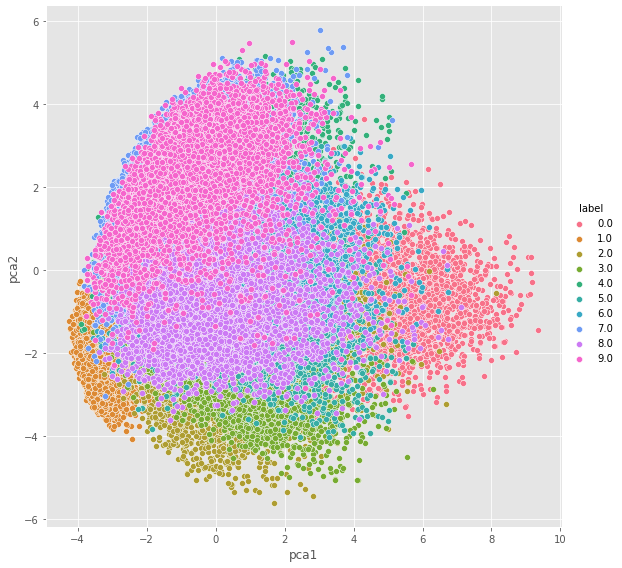

In [331]:
sns.FacetGrid(pca_subset, hue='label', size=8).map(sns.scatterplot, 'pca1', 'pca2').add_legend()
plt.show()

784차원의 mnist데이터를 주성분 두 개의 2차원 평면상에 표현했을 때, label이 비슷한 위치에 분포되어 있는 것을 확인할 수 있다. 주성분이 어느 정도의 설명력을 갖고 있음을 실감할 수 있다. 

# LDA

In [304]:
lda = LDA()
lda_arr = lda.fit_transform(X_train, y_train.flatten())
lda_cols = [f'lda{num+1}' for num in range(lda_arr.shape[1])]
lda_df = pd.DataFrame(lda_arr, columns = lda_cols)

In [306]:
lda_df.head()

,lda1,lda2,lda3,lda4,lda5,lda6,lda7,lda8,lda9
0,2.026232,-1.862094,2.674239,-1.799669,0.015231,-2.615773,2.463024,1.135498,1.971643
1,-2.567701,-1.921702,5.265239,1.403659,-0.503923,2.041162,0.640984,0.219801,0.412900
2,-2.188634,-0.573438,4.395377,0.935509,1.019655,-0.516161,0.160554,1.729828,-1.175969
3,-1.950248,-0.426195,-1.622305,0.187777,-0.433338,0.754426,0.144803,-1.778356,0.842931
4,-0.620315,-0.734516,-1.723613,0.341295,0.744925,1.024203,1.113762,-0.281217,0.329203


In [336]:
# explained_variance_ratio: Percentage of variance explained by each of the selected components.
# cum_sum_ratio: explained_variance_ratio의 누적합 
result_lda = pd.DataFrame({'explained_variance_ratio':lda.explained_variance_ratio_})
result_lda['cum_sum_ratio'] = result_lda['explained_variance_ratio'].cumsum()
result_lda

,explained_variance_ratio,cum_sum_ratio
0,0.237181,0.237181
1,0.203001,0.440182
2,0.176614,0.616796
3,0.107213,0.724009
4,0.094599,0.818608
5,0.069633,0.888241
6,0.050416,0.938657
7,0.034112,0.972770
8,0.027230,1.000000


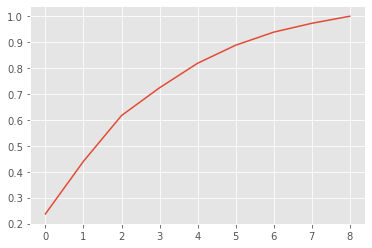

In [338]:
plt.plot(result_lda['cum_sum_ratio'])

lda의 n_components 개수는 min(n_classes - 1, n_features) 이므로 10개의 label class를 갖는 mnist데이터의 경우 9개로 차원이 축소된다. lda에서는 따로 최적의 n_components개수를 구하는 대신 9개를 전부 사용하는 것으로 결정!   

4) lda 차원축소 feature 개수: `9개`

###  lda1, lda2로 레이블 분포 시각화

In [340]:
lda_subset = lda_df.iloc[:, :2] # 첫 번째, 두 번째 주성분만 가져오기 
lda_subset['label'] = y_train.flatten()

<ipython-input-340-955ee28f7d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lda_subset['label'] = y_train.flatten()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


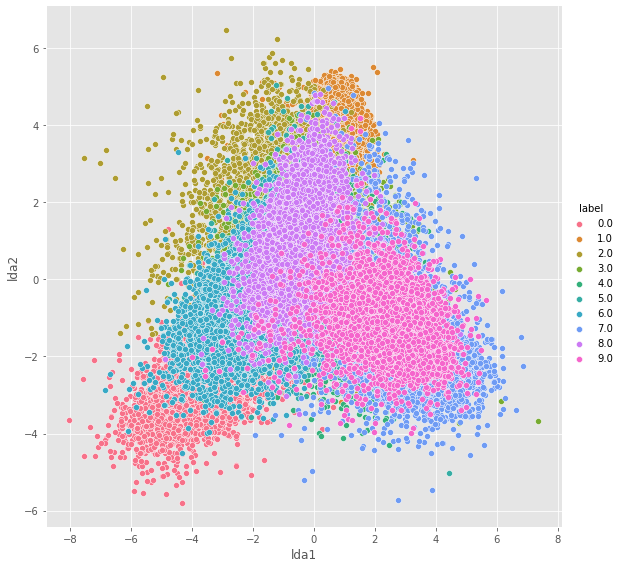

In [341]:
sns.FacetGrid(lda_subset, hue='label', size=8).map(sns.scatterplot, 'lda1', 'lda2').add_legend()
plt.show()

같은 방식으로 시각화한 pca의 결과와 사뭇 다르다. 

### LDA로 mnist label 예측 

In [354]:
from sklearn.metrics import accuracy_score

In [355]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test.flatten(), y_pred)

In [356]:
accuracy

0.8694285714285714

lda 분류기를 사용하여 mnist label을 예측해도 높은 accuracy가 나온다. 

# 분류 모델 학습을 통해 PCA/LDA feature extraction 데이터에 대해 분류 성능 비교하기 

성능을 비교할 feature extraction data는 다음과 같다.   

1. PCA
    * PCA16: explained_variance over 0.7
    * PCA49: elbow point
2. LDA
    * LDA9: LDA feature extraction data


**Classification Model: RandomForestClassifier**

In [387]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [388]:
# fe dataset 정의  

#-- PCA16
PCA16 = PCA(n_components=16)
X_train_PCA16 = PCA16.fit_transform(X_train)
X_test_PCA16 = PCA16.transform(X_test)
#-- PCA49
PCA49 = PCA(n_components=49)
X_train_PCA49 = PCA49.fit_transform(X_train)
X_test_PCA49 = PCA49.transform(X_test)
#-- LDA
lda = LDA()
X_train_LDA = lda.fit_transform(X_train, y_train.flatten())
X_test_LDA = lda.transform(X_test)

### PCA16

In [389]:
# model fit
clf.fit(X_train_PCA16, y_train.flatten())
# inference
y_pred = clf.predict(X_test_PCA16)
accuracy = accuracy_score(y_test.flatten(), y_pred)

print('PCA16 classification accuracy: ', accuracy)

PCA16 classification accuracy:  0.9427142857142857


### PCA49

In [390]:
# model fit
clf.fit(X_train_PCA49, y_train.flatten())
# inference
y_pred = clf.predict(X_test_PCA49)
accuracy = accuracy_score(y_test.flatten(), y_pred)

print('PCA49 classification accuracy: ', accuracy)

PCA49 classification accuracy:  0.9562142857142857


### LDA

In [391]:
# model fit
clf.fit(X_train_LDA, y_train.flatten())
# inference
y_pred = clf.predict(X_test_LDA)
accuracy = accuracy_score(y_test.flatten(), y_pred)

print('LDA classification accuracy: ', accuracy)

LDA classification accuracy:  0.9137857142857143


하나의 분류기 모델을 사용한 간단한 실험이었지만, PCA49로 feature extraction을 해서 모델을 학습시킨 결과가 가장 좋았다. 하지만, PCA49가 LDA와 PCA16에 비해 복잡한 모델이라는 점에서 어떤 모델을 활용할 것인지에 대해서는 고민이 필요할 것 같다. 